
# Random Forest Project 
**-by Om Kapoor**

In this project our task is to create a model to predict whether a new customer seeking for a loan will payback his loan or not. This will be done using a dataset from www.LendingClub.com. In this dataset there is information about the past customers who took a loan from a bank and whether they paid it back or not.  
Based on the features, we will create a Machine Learning model to determine if now a customer comes in the bank, seeing his credentials is it a good decision to loan him money or not, basically if he will be a defaulter or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

To start we try to get an insight on the fico scores of the borrowoers, seggregated by their compliance with the credit policy

Text(0.5, 0, 'fico')

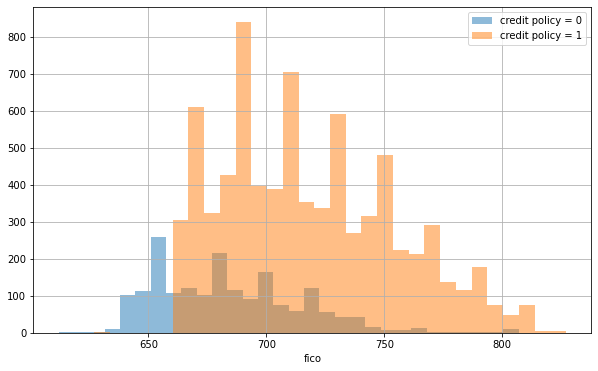

In [5]:
plt.figure(figsize=(10,6))
df[df['credit.policy'] == 0]['fico'].hist(alpha=0.5,bins=30,label='credit policy = 0')
df[df['credit.policy'] == 1]['fico'].hist(alpha=0.5,bins=30,label='credit policy = 1')
plt.legend()
plt.xlabel('fico')


Now we visualize the same fico scores on the basis of the feature "not.fully.paid" 

Text(0.5, 0, 'fico')

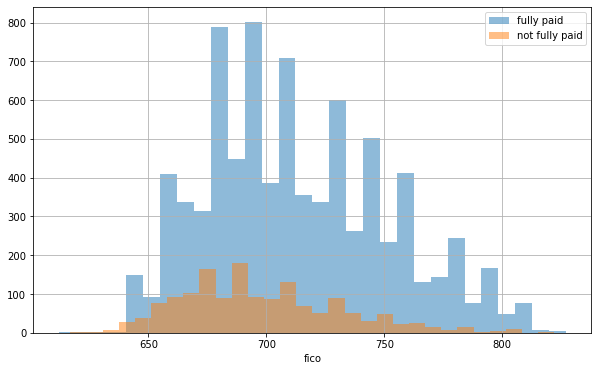

In [6]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid'] == 0]['fico'].hist(alpha=0.5,bins=30,label='fully paid')
df[df['not.fully.paid'] == 1]['fico'].hist(alpha=0.5,bins=30,label='not fully paid')
plt.legend()
plt.xlabel('fico')

Next we want to see the counts of loans taken for different "purpose", seggregated by "not.fully.paid"

C:\Users\omkap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


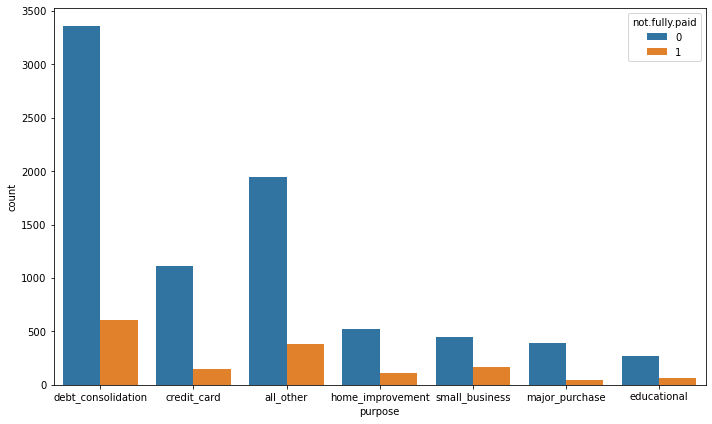

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(df['purpose'],hue=df['not.fully.paid'])
plt.tight_layout()

Next we see the trend between FICO score and the interest rate provided for the loan

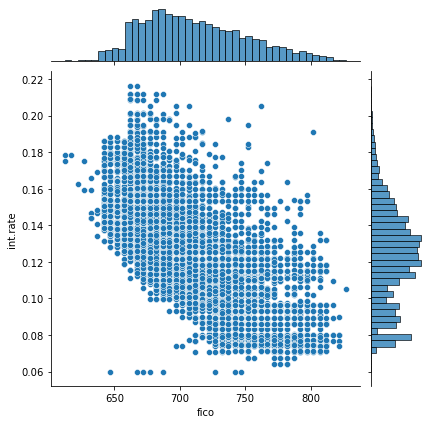

In [8]:
sns.jointplot(x='fico',y='int.rate',data=df)

Now we need to see if the trend differed between not.fully.paid and credit.policy over the fico scores, hence we create a lmplot

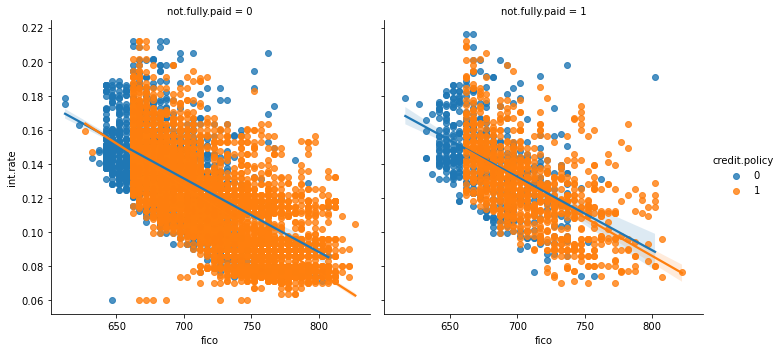

In [9]:
sns.lmplot(x='fico',y='int.rate',data=df,col='not.fully.paid',hue='credit.policy')

# Setting up the Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


As we see from the info(),the "purpose" column has categorical values. We cannot use that in a model as we need numerical values to work with.
Hence we transform these values using dummy variables so that sklearn will be able to understand them.

In [11]:
cat_feats = ['purpose']

In [12]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [13]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now we split our data into a training set and a testing set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = final_data.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training a Decision Tree Model

For this project we choose the Decision Tree model.

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation

In [19]:
pred = dtree.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2402
           1       0.21      0.22      0.22       472

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.74      0.74      2874

[[2013  389]
 [ 366  106]]


## Random Forest model

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier(n_estimators=500)

In [24]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

## Predictions and Evaluation

In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
print(classification_report(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      2855
           1       0.02      0.58      0.04        19

    accuracy                           0.84      2874
   macro avg       0.51      0.71      0.48      2874
weighted avg       0.99      0.84      0.91      2874



In [27]:
print(confusion_matrix(rfc_pred,y_test))

[[2394  461]
 [   8   11]]


As we can see for the random forests model, the overall performance is a bit better than the decision trees.

But to decide on which model to go with, we need more business kowledge about the problem so as to make an informed decision. As we can see that the random forests model did overall better, but at points the metrics for the decision trees were more impressive.